In [2]:
# Author: Ciarán O'Brien & Chloe Doyle
# Lecture: Svetlana Hensman
# Submitted: 07/12/18
# This file is in response to the second assignment as set out per the classification goal


In [43]:
# Boiler plate imports
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import re
import time
import cardinality
import statistics
from math import floor
from statistics import mean, median
from collections import Counter
from sympy import pretty_print as pp,latex
import seaborn as sn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [4]:
data = pd.read_csv("data/trainingset.txt",sep='\,',header=None, encoding='utf-8')

c:\users\ciaran\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [11]:
data.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,TR1,44,"""JobCat9""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",0,1,-1,0,"""unknown""","""TypeA"""
1,TR2,31,"""JobCat4""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",0,1,-1,0,"""unknown""","""TypeA"""
2,TR3,42,"""JobCat4""","""divorced""","""tertiary""","""yes""",2,"""yes""","""no""","""unknown""",5,"""may""",0,1,-1,0,"""unknown""","""TypeA"""
3,TR4,58,"""JobCat2""","""married""","""primary""","""no""",121,"""yes""","""no""","""unknown""",5,"""may""",0,1,-1,0,"""unknown""","""TypeA"""
4,TR5,43,"""JobCat9""","""single""","""secondary""","""no""",593,"""yes""","""no""","""unknown""",5,"""may""",0,1,-1,0,"""unknown""","""TypeA"""


In [20]:
continuous_data = data.select_dtypes(include = ['int64','float64'])
categorical_data = data.select_dtypes(include = ['object'])

In [26]:
categorical_data.drop('id', axis=1, inplace=True)
categorical_data.head()

c:\users\ciaran\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,"""JobCat9""","""single""","""secondary""","""no""","""yes""","""no""","""unknown""","""may""","""unknown""","""TypeA"""
1,"""JobCat4""","""married""","""secondary""","""no""","""yes""","""yes""","""unknown""","""may""","""unknown""","""TypeA"""
2,"""JobCat4""","""divorced""","""tertiary""","""yes""","""yes""","""no""","""unknown""","""may""","""unknown""","""TypeA"""
3,"""JobCat2""","""married""","""primary""","""no""","""yes""","""no""","""unknown""","""may""","""unknown""","""TypeA"""
4,"""JobCat9""","""single""","""secondary""","""no""","""yes""","""no""","""unknown""","""may""","""unknown""","""TypeA"""


# Data exploration

Viewing all the unique values from each coloumn


## Results 

Column 12 only contain 1 unique value, it's no use to us.
Columns 5,7,8 are only binary 

In [6]:
for col in data.columns.values:
    print(col, data[col].unique())

0 ['TR1' 'TR2' 'TR3' ... 'TR24316' 'TR24317' 'TR24318']
1 [44 31 42 58 43 57 51 45 40 37 52 46 34 49 50 60 54 30 53 33 55 47 59 41
 27 56 26 48 24 32 29 36 28 35 22 21 23 25 61 20 19 18 66 83 70 68 65 64
 69 62 75 71 67 76 85 63 90 73 78 80 94 72 17 74 86 79 95 82 81 77 16 84
 87 93 88]
2 ['"JobCat9"' '"JobCat4"' '"JobCat2"' '"JobCat7"' '"JobCat11"' '"JobCat6"'
 '"JobCat3"' '"JobCat8"' '"JobCat10"' '"JobCat1"' '"JobCat5"' '"unknown"']
3 ['"single"' '"married"' '"divorced"']
4 ['"secondary"' '"tertiary"' '"primary"' '"unknown"']
5 ['"no"' '"yes"']
6 [   29     2   121 ... 16353  5083  4655]
7 ['"yes"' '"no"']
8 ['"no"' '"yes"']
9 ['"unknown"' '"cellular"' '"telephone"']
10 [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
11 ['"may"' '"jun"' '"jul"' '"aug"' '"oct"' '"nov"' '"dec"' '"jan"' '"feb"'
 '"mar"' '"apr"' '"sep"']
12 [0]
13 [ 1  2  3  5  4  6  8  7  9 10 13 11 12 14 32 18 22 15 17 25 21 19 63 26
 28 16 50 38 23 24 37 27 29 30 41 20 3

# TODO 
Look at removing all the "" from the values entries

## Optional
set the columns from a regex apllied to the text file provided by Svetlana, datadescription.txt

In [119]:

# with open('data/datadescription.txt', 'r') as myfile:
#     filedata=myfile.read().replace('\n', '')

In [91]:
# expression = re.compile("((100)|[1-9]\d? - \b[^\d\W]+\b)")
# regx = '(100)|[1-9]\d? - \b[^\d\W]+\b'


# match = re.findall(regx,filedata)
# print(match)
#     #print(re.search(expression,str(dataFeatures[rows])))

In [9]:
data.columns = ["id","age","job","marital","education","default","balance","housing","loan","contact","day","month","duration","campaign","pdays","previous","poutcome","y"]

In [29]:
def label_encode(df, columns):
    for col in columns:
        le = LabelEncoder()
        col_values_unique = list(df[col].unique())
        le_fitted = le.fit(col_values_unique)
 
        col_values = list(df[col].values)
        le.classes_
        col_values_transformed = le.transform(col_values)
        df[col] = col_values_transformed
 
# Encoding a unique label to each catergorical data entry
df_categorical_labled = categorical_data.copy(deep=True)
to_be_encoded_cols = df_categorical_labled.columns.values
label_encode(df_categorical_labled, to_be_encoded_cols)
display(df_categorical_labled.head())


,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,10,2,1,0,1,0,2,8,3,0
1,5,1,1,0,1,1,2,8,3,0
2,5,0,2,1,1,0,2,8,3,0
3,3,1,0,0,1,0,2,8,3,0
4,10,2,1,0,1,0,2,8,3,0


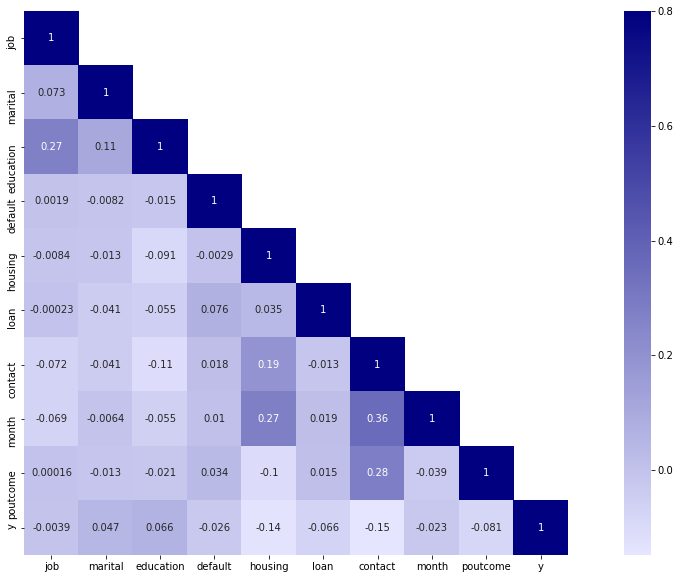

In [30]:
# Heatmap of the coeffecients 
# Shows how dependant each column is on each other 
# Needs the encoding above to work
my_cmap = sn.light_palette("Navy", as_cmap=True)
corrMatt = df_categorical_labled.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True,cmap=my_cmap)


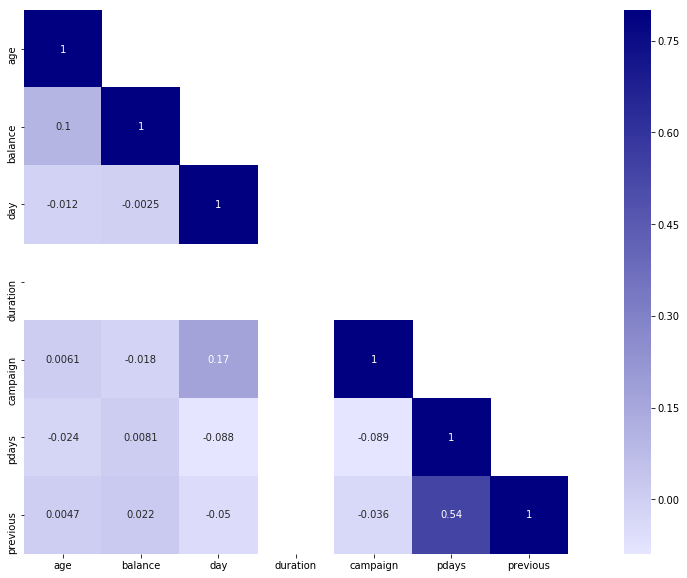

In [12]:
# Heatmap of the coeffecients 
# Shows how dependant each column is on each other 
# Needs the encoding above to work
my_cmap = sn.light_palette("Navy", as_cmap=True)
corrMatt = data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True,cmap=my_cmap)


# Results

Further away from 1, the higher the correlation 

In [118]:
#Here we'll split the data into our training and validation sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Classification
She said we can build our classifier from sklearn librayr, they have a load of classifiers compared [here.](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)

Each classifier take various different values, each are outlined in the documentation

In [39]:
def get_train_test(df, y_col, x_cols, ratio):
    """ 
    This method transforms a dataframe into a train and test set, for this you need to specify:
    1. the ratio train : test (usually 0.7)
    2. the column with the Y_values
    """
    mask = np.random.rand(len(df)) < ratio
    df_train = df[mask]
    df_test = df[~mask]
       
    Y_train = df_train[y_col].values
    Y_test = df_test[y_col].values
    X_train = df_train[x_cols].values
    X_test = df_test[x_cols].values
    return df_train, df_test, X_train, Y_train, X_test, Y_test

In [45]:
dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
#     "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=1000),
    "Decision Tree": tree.DecisionTreeClassifier(),
#     "Random Forest": RandomForestClassifier(n_estimators=1000),
#     "Neural Net": MLPClassifier(alpha = 1),
    "Naive Bayes": GaussianNB()
}

In [32]:
def batch_classify(X_train, Y_train, X_test, Y_test, no_classifiers = 5, verbose = True):
    """
    This method, takes as input the X, Y matrices of the Train and Test set.
    And fits them on all of the Classifiers specified in the dict_classifier.
    The trained models, and accuracies are saved in a dictionary. The reason to use a dictionary
    is because it is very easy to save the whole dictionary with the pickle module.
    
    Usually, the SVM, Random Forest and Gradient Boosting Classifier take quiet some time to train. 
    So it is best to train them on a smaller dataset first and 
    decide whether you want to comment them out or not based on the test accuracy score.
    """
    
    dict_models = {}
    for classifier_name, classifier in list(dict_classifiers.items())[:no_classifiers]:
        t_start = time.clock()
        classifier.fit(X_train, Y_train)
        t_end = time.clock()
        
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, Y_train)
        test_score = classifier.score(X_test, Y_test)
        
        dict_models[classifier_name] = {'model': classifier, 'train_score': train_score, 'test_score': test_score, 'train_time': t_diff}
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=classifier_name, f=t_diff))
    return dict_models

In [31]:
def display_dict_models(dict_models, sort_by='test_score'):
    cls = [key for key in dict_models.keys()]
    test_s = [dict_models[key]['test_score'] for key in cls]
    training_s = [dict_models[key]['train_score'] for key in cls]
    training_t = [dict_models[key]['train_time'] for key in cls]
    

In [46]:
y_col_bank = 'job'
x_cols_glass = list(df_categorical_labled.columns.values)
train_test_ratio = 0.7
df_train, df_test, X_train, Y_train, X_test, Y_test = get_train_test(df_categorical_labled, y_col_bank, x_cols_glass, train_test_ratio)

dict_models = batch_classify(X_train, Y_train, X_test, Y_test, no_classifiers = 8)
display_dict_models(dict_models)

trained Logistic Regression in 1.98 s
trained Nearest Neighbors in 0.09 s
trained Decision Tree in 0.02 s
trained Linear SVM in 3.73 s
trained Naive Bayes in 0.06 s
